<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
data = [
        {
            "name":"A",
            "index":0,
            "next_edge":
                [
                  {"cost":20,"index_node":1},
                  {"cost":30,"index_node":3}
                ]
        },
        {
            "name":"B",
            "index":1,
            "next_edge":
               [
                {"cost":20,"index_node":2}
               ]
        },
        {
            "name":"C",
            "index":2,
            "next_edge":
              [
               {"cost":10,"index_node":3}
              ]
        },
        {
            "name":"D",
            "index":3,
            "next_edge":
              [
               
              ]
        }
       ]

In [33]:
class dfs:
  def __init__(self,data,startNode=0):
    self.__data = data
    self.__manageData()
    self.stack = []
    self.stack.append(data[startNode])
  
  def step(self):
    if(len(self.stack)>0):
      node_data = self.stack.pop();

      for edge in node_data["next_edge"]:
        next_index_node = edge["index_node"]
        next_node = self.__data[next_index_node]
        self.stack.append(next_node)
        self.__updateCost(node_data,next_node,edge)
        

      return node_data
    return None
  
  def __manageData(self):
    for node in self.__data:
      node["prev_node_best"] = {}
      node["prev_node_best"] = {"index_node":-1,"best_cost":None}

  def __updateCost(self,node_data,next_node,edge):
    node_best_cost = 0
    if node_data["prev_node_best"]["best_cost"] is not None:
      node_best_cost = node_data["prev_node_best"]["best_cost"]

    if next_node["prev_node_best"]["best_cost"] is None or next_node["prev_node_best"]["best_cost"] > edge["cost"]+node_best_cost:
        next_node["prev_node_best"]["best_cost"] = edge["cost"] + node_best_cost
        next_node["prev_node_best"]["index_node"] = node_data["index"]

  def getData(self):
    return self.__data


In [124]:
import matplotlib.pyplot as plt
import networkx as nx


In [128]:
class Graph_DFS:
  def __init__(self,data):
    self.G=nx.Graph()
    self.__createGraph(data)

  def __createGraph(self,data):
    for node in data:
      for next_edge in node["next_edge"]:
        index_next_node = next_edge["index_node"]
        next_node = data[index_next_node]
        self.G.add_edge(node["index"],next_node["index"],weight=1)
        self.pos=nx.spring_layout(G) # positions for all nodes

  def drawGraph(self,index_node):
    all_node = G.nodes
    mark_node = [index_node]
    other_node = [i for i, e in enumerate(all_node) if i != index_node]
    print(mark_node) 

    all_edge = G.edges(data=True)

    # nodes
    nx.draw_networkx_nodes(self.G,self.pos,nodelist=mark_node,node_size=700,node_color='#00ff00')

    nx.draw_networkx_nodes(self.G,self.pos,nodelist=other_node,node_size=700,node_color='#0000ff')

    # labels
    nx.draw_networkx_labels(self.G,self.pos,font_size=20,font_family='sans-serif')

    
    # edges
    nx.draw_networkx_edges(self.G,self.pos,edgelist=all_edge,
                        width=2,arrows=True,arrowsize=20, arrowstyle='fancy')

    plt.axis('off')
    plt.savefig("weighted_graph.png") # save as png
    plt.show() # display


In [129]:
graph = Graph_DFS(data)

[2]


TypeError: ignored

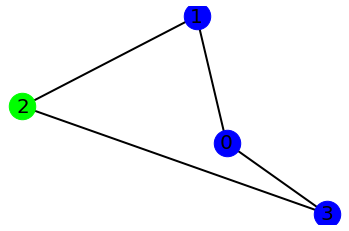

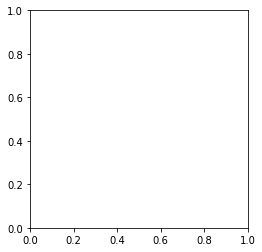

In [130]:

graph.drawGraph(2)

In [13]:
search = dfs(data)
result = search.step()
print(result)
while result is not None:
  result = search.step()
  print(result)

print(search.getData())

{'name': 'A', 'index': 0, 'next_edge': [{'cost': 20, 'index_node': 1}, {'cost': 30, 'index_node': 3}], 'prev_node_best': {'index_node': -1, 'best_cost': None}}
{'name': 'D', 'index': 3, 'next_edge': [], 'prev_node_best': {'index_node': 0, 'best_cost': 30}}
{'name': 'B', 'index': 1, 'next_edge': [{'cost': 20, 'index_node': 2}], 'prev_node_best': {'index_node': 0, 'best_cost': 20}}
{'name': 'C', 'index': 2, 'next_edge': [{'cost': 10, 'index_node': 3}], 'prev_node_best': {'index_node': 1, 'best_cost': 40}}
{'name': 'D', 'index': 3, 'next_edge': [], 'prev_node_best': {'index_node': 0, 'best_cost': 30}}
None
[{'name': 'A', 'index': 0, 'next_edge': [{'cost': 20, 'index_node': 1}, {'cost': 30, 'index_node': 3}], 'prev_node_best': {'index_node': -1, 'best_cost': None}}, {'name': 'B', 'index': 1, 'next_edge': [{'cost': 20, 'index_node': 2}], 'prev_node_best': {'index_node': 0, 'best_cost': 20}}, {'name': 'C', 'index': 2, 'next_edge': [{'cost': 10, 'index_node': 3}], 'prev_node_best': {'index_no